In [1]:
import sys
sys.path.append('../')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.decomposition import PCA
from plotting_utils import save_figure
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import warnings
warnings.simplefilter("ignore")
from num_cat_data_transformers import PreprocessingPipeline
# from k_means_clusters import cluster_and_visualize
# from dimensionality_reduction import pca_reduction, tsne_reduction, umap_reduction

import matplotlib as mpl
import matplotlib.font_manager as font_manager

# Font settings
mpl.rcParams['font.family'] = 'serif'
cmfont = font_manager.FontProperties(fname=mpl.get_data_path() + '/fonts/ttf/cmr10.ttf')
mpl.rcParams['font.serif'] = cmfont.get_name()
mpl.rcParams['mathtext.fontset'] = 'cm'
mpl.rcParams['axes.unicode_minus'] = False
mpl.rcParams['axes.formatter.use_mathtext'] = True

In [2]:
# read the data from the csv file
df = pd.read_csv('/Users/annabzinkowska/DTU/DTU_master_thesis/00_data/processed_data_all_vol_2.csv')

In [4]:
# Calculate the number of words in each string in the column
df['word_count'] = df['description'].apply(lambda x: len(x.split()))

# Compute the average word count
average_word_count = df['word_count'].mean()

print(average_word_count)

6.616477688904515


In [4]:
num_cols = ['quantity_sum', 'price_sum', 'unit_weight', 'unit_price_mean', 'customer_id_count', 'customer_country_count']

<Figure size 3200x2400 with 0 Axes>

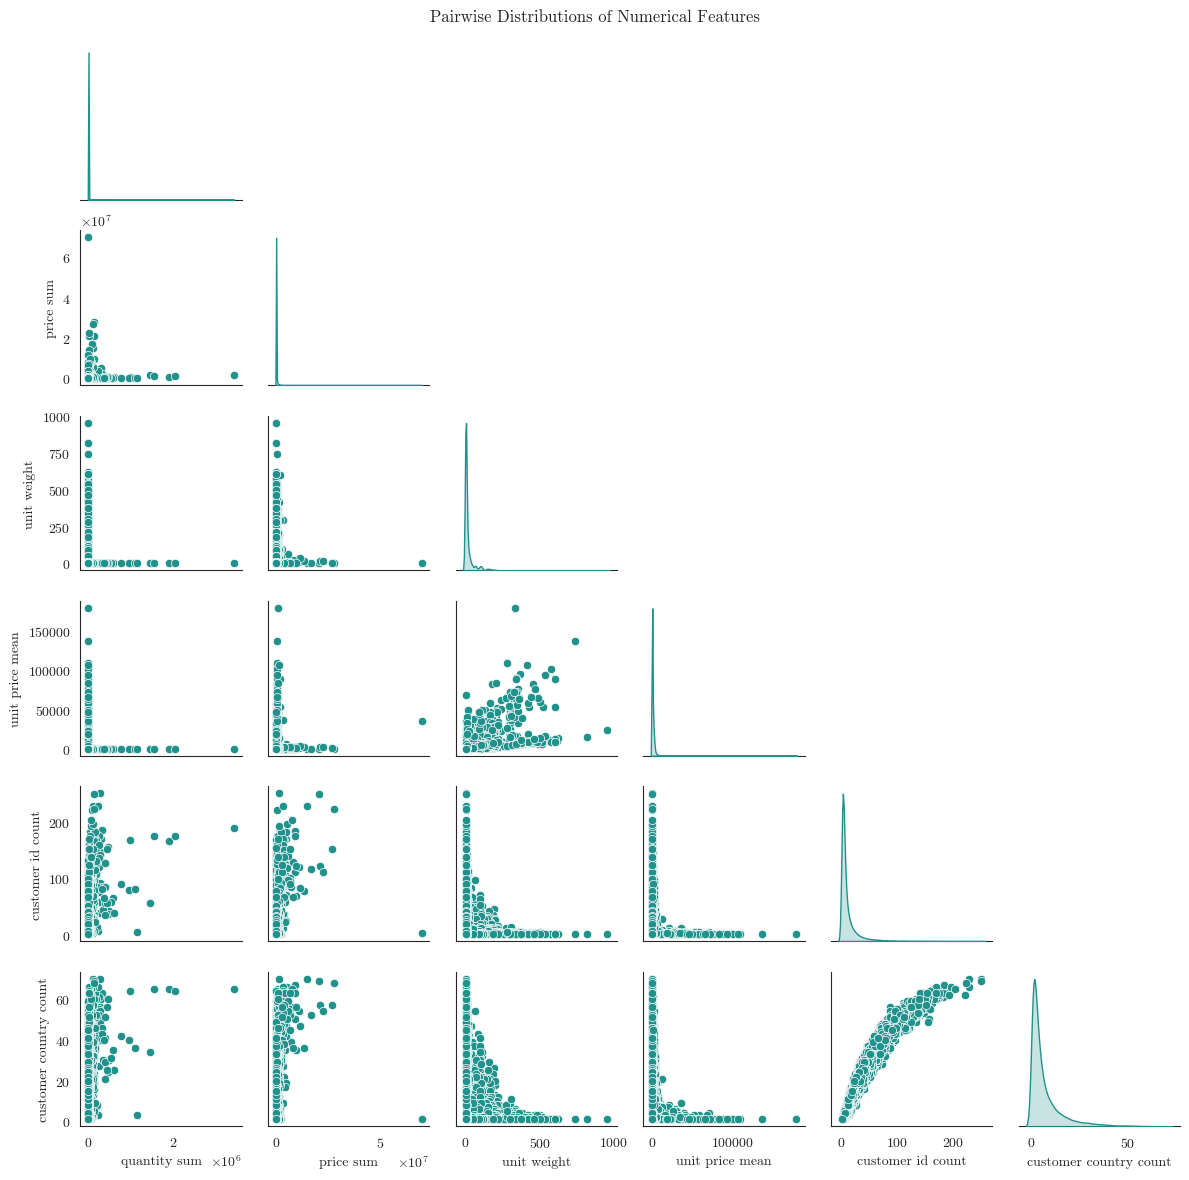

In [8]:
# Renaming columns: replacing underscores and capitalizing
renamed_columns = {col: col.replace('_', ' ') for col in df.columns}
df_renamed = df.rename(columns=renamed_columns)

# Updating num_cols to reflect the new column names
num_cols_renamed = [renamed_columns[col] for col in num_cols if col in renamed_columns]

# Set the Viridis color palette
sns.set_palette(sns.color_palette("viridis", 1))
plt.figure(dpi = 500)

# Set the style of the visualization
sns.set_style("white")

# Font settings
mpl.rcParams['font.family'] = 'serif'
cmfont = font_manager.FontProperties(fname=mpl.get_data_path() + '/fonts/ttf/cmr10.ttf')
mpl.rcParams['font.serif'] = cmfont.get_name()
mpl.rcParams['mathtext.fontset'] = 'cm'
mpl.rcParams['axes.unicode_minus'] = False
mpl.rcParams['axes.formatter.use_mathtext'] = True

# Plotting the pairplot with renamed columns
corr_plot = sns.pairplot(data=df_renamed[num_cols_renamed], diag_kind="kde", corner=True, height=2)

# Adjusting the layout to ensure everything fits well
plt.tight_layout()

# Add space at the top for the title
plt.subplots_adjust(top=0.95)

# Add a title above the plot
plt.suptitle('Pairwise Distributions of Numerical Features')

# Show the plot
plt.show()

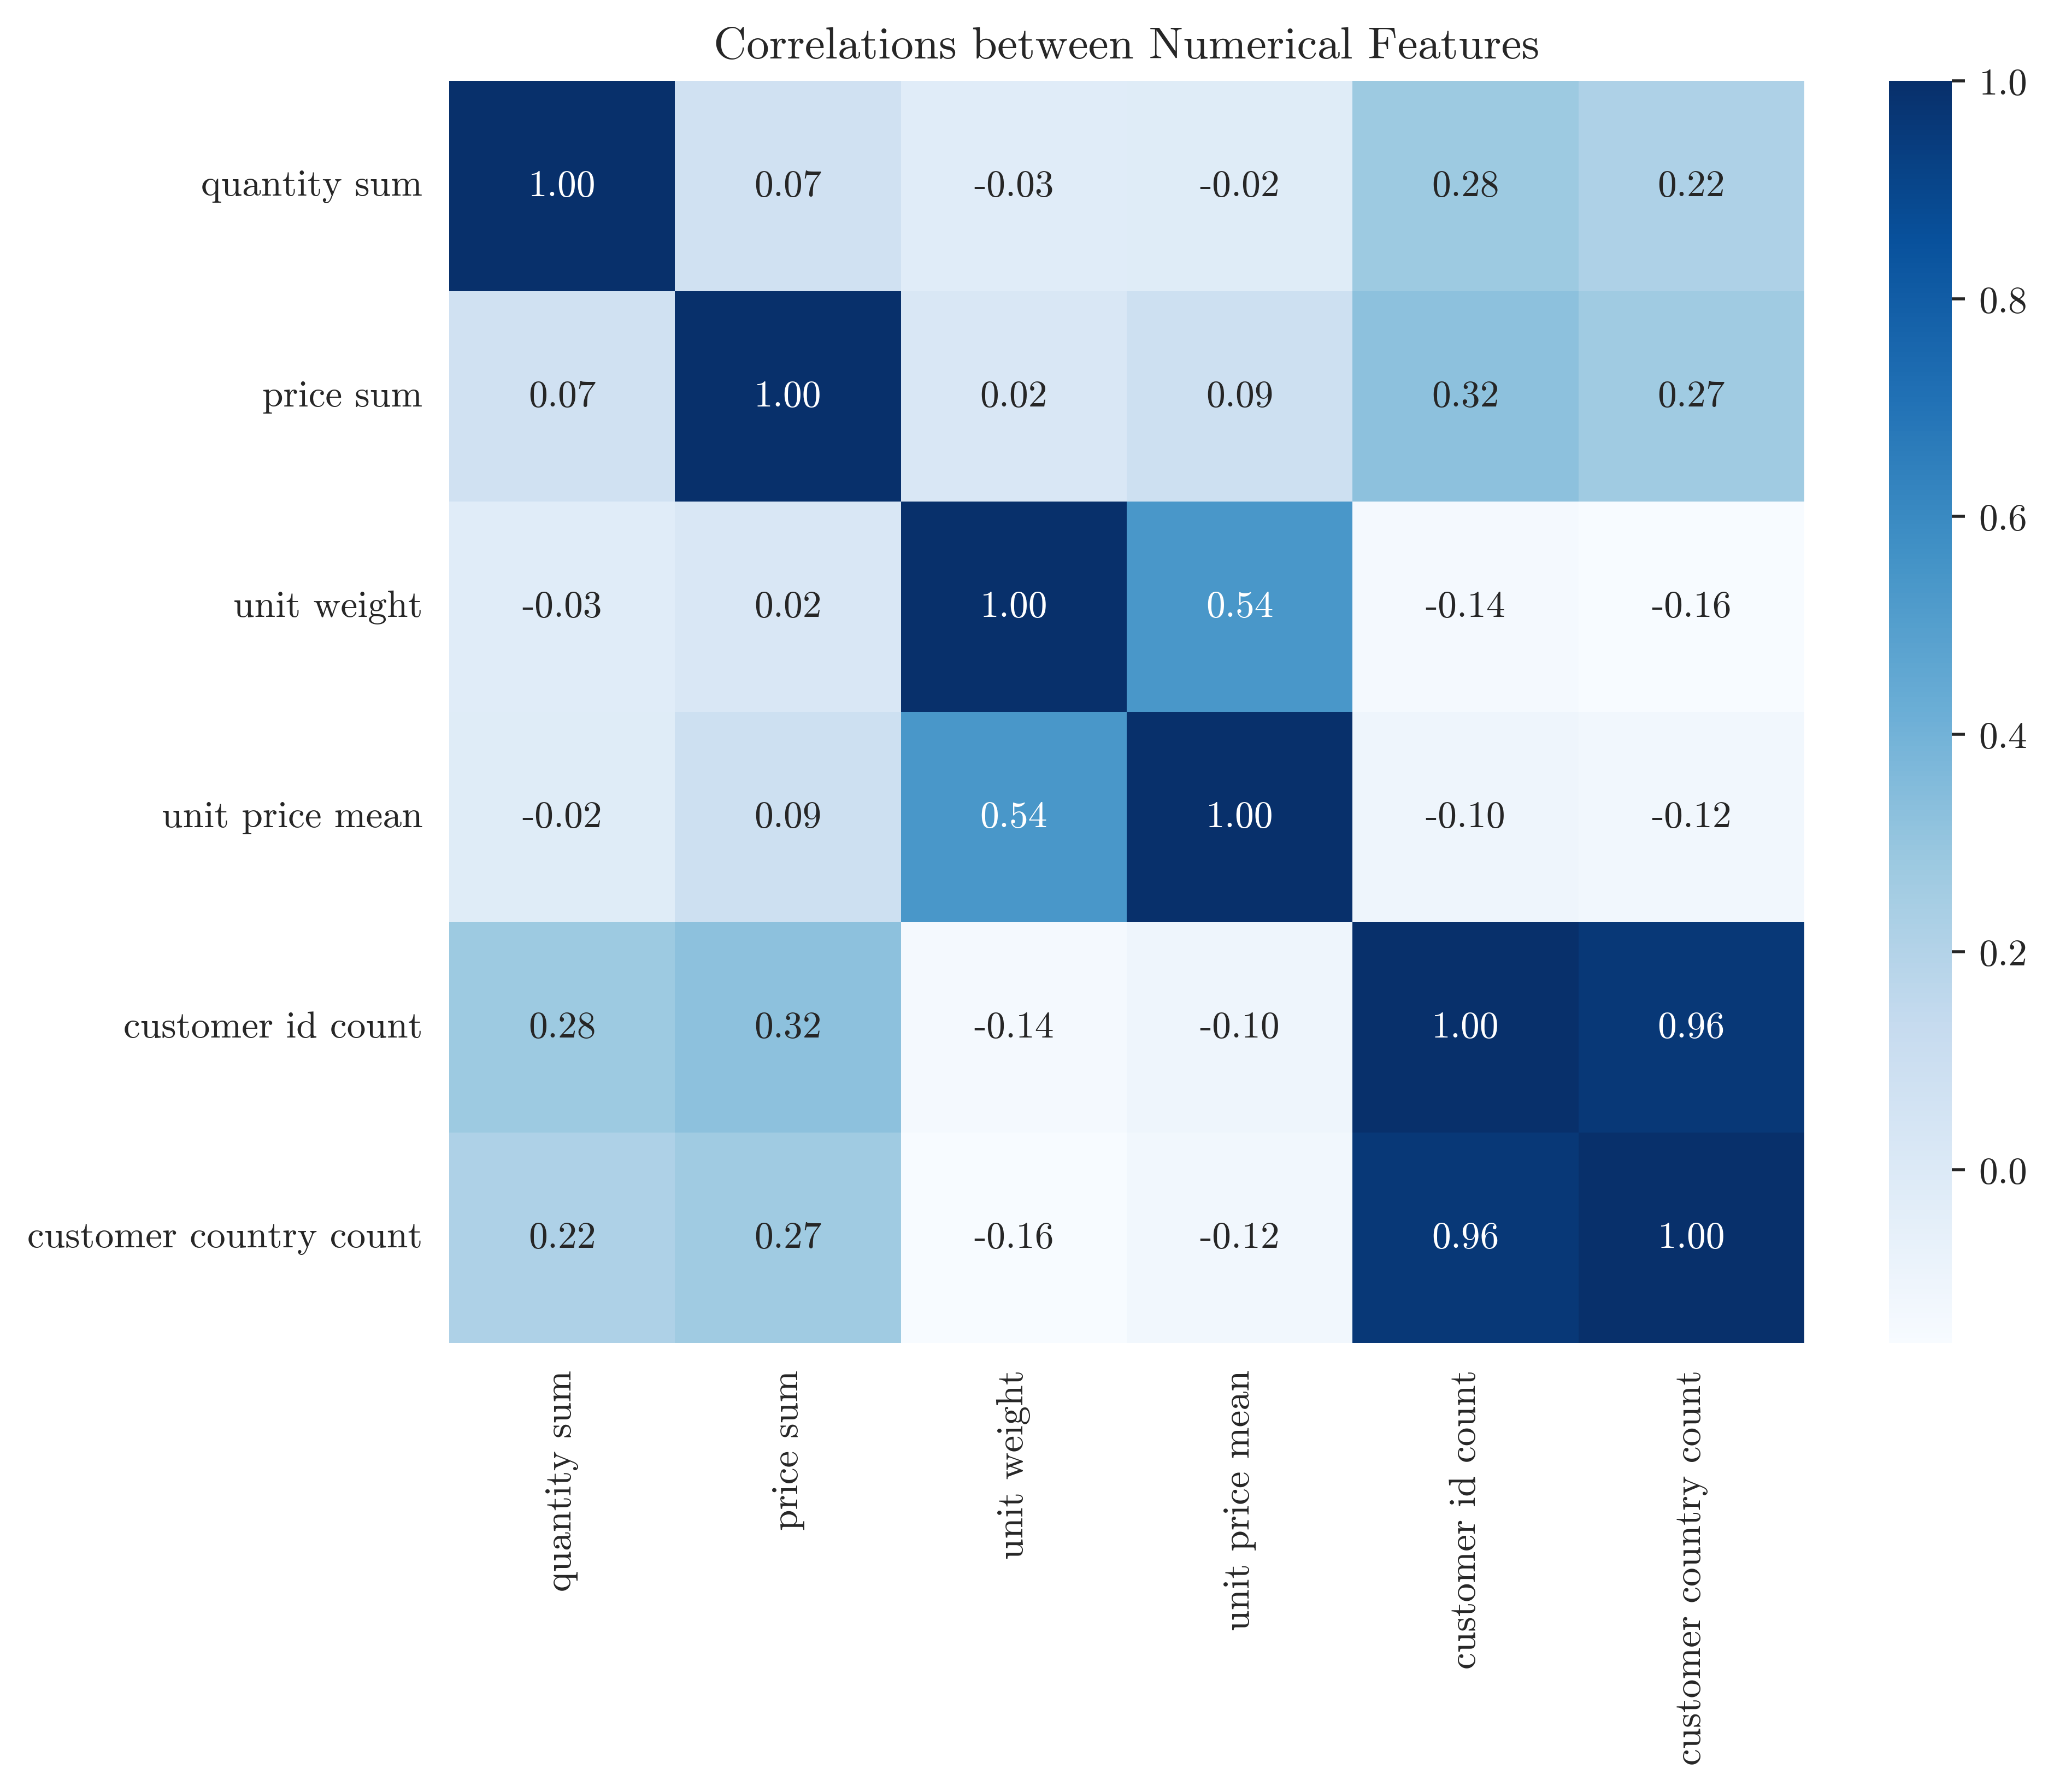

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("whitegrid")

# Font settings
mpl.rcParams['font.family'] = 'serif'
cmfont = font_manager.FontProperties(fname=mpl.get_data_path() + '/fonts/ttf/cmr10.ttf')
mpl.rcParams['font.serif'] = cmfont.get_name()
mpl.rcParams['mathtext.fontset'] = 'cm'
mpl.rcParams['axes.unicode_minus'] = False
mpl.rcParams['axes.formatter.use_mathtext'] = True

# Compute the correlation matrix
corr = df[num_cols].corr()

corr.columns = corr.columns.str.replace('_', ' ')
corr.index = corr.index.str.replace('_', ' ')

# Set up the matplotlib figure
plt.figure(figsize=(8, 6), dpi = 500)

# Draw the heatmap
sns.heatmap(corr, annot=True, fmt=".2f", cmap='Blues')

# Add a title
plt.title('Correlations between Numerical Features')

# Show the plot
plt.show()

<Figure size 1920x1440 with 0 Axes>

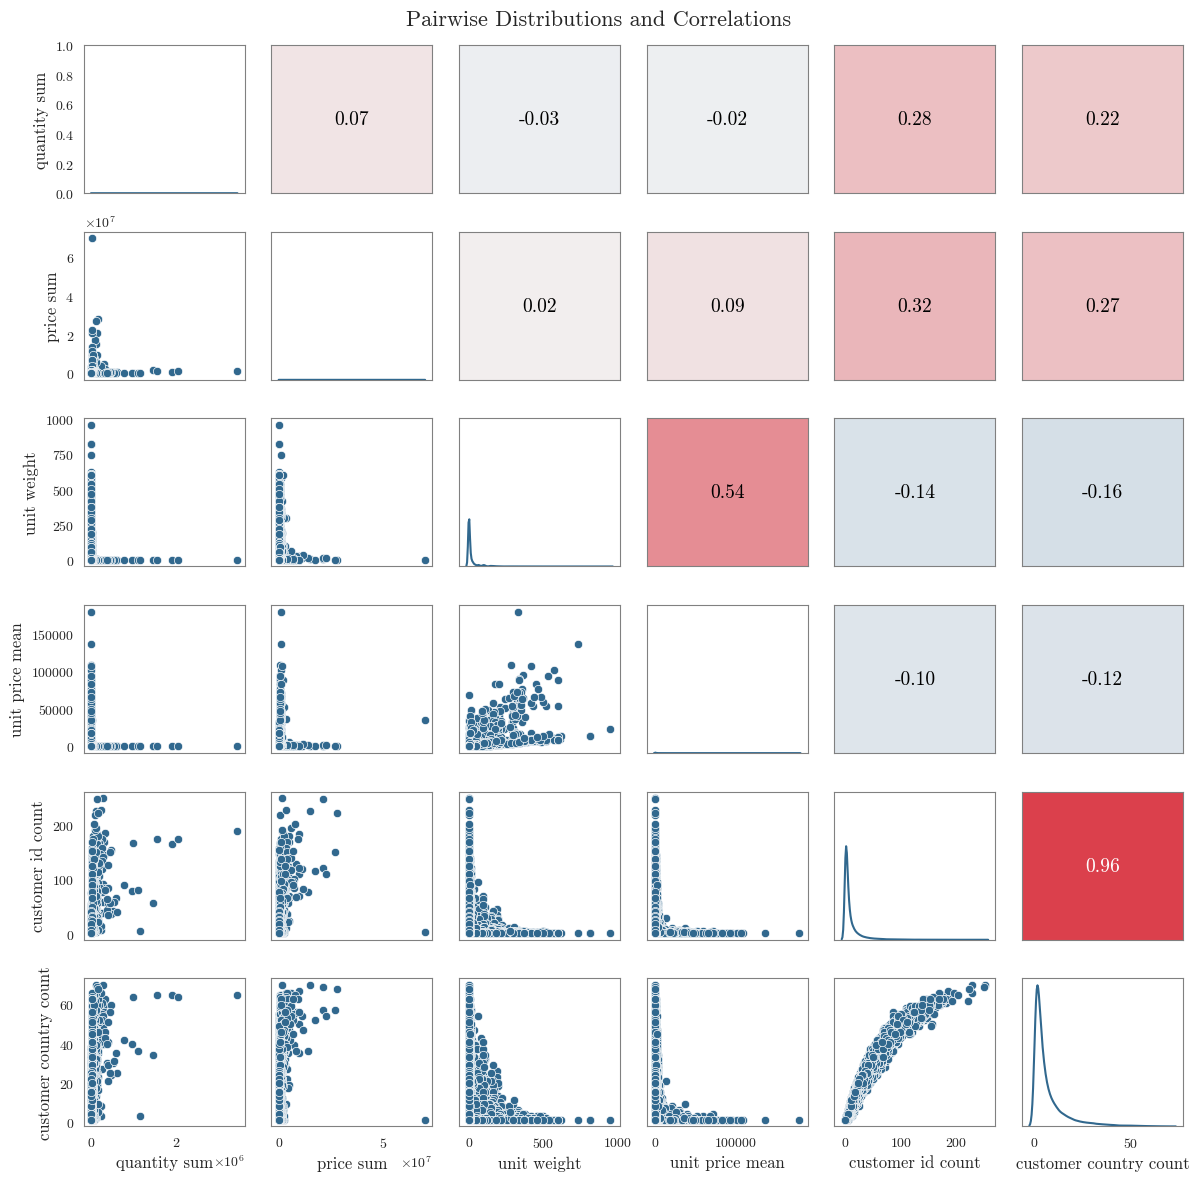

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
import matplotlib.font_manager as font_manager

sns.set_style("white")

plt.figure(dpi=300)

# Font settings
mpl.rcParams['font.family'] = 'serif'
cmfont = font_manager.FontProperties(fname=mpl.get_data_path() + '/fonts/ttf/cmr10.ttf')
mpl.rcParams['font.serif'] = [cmfont.get_name()]
mpl.rcParams['mathtext.fontset'] = 'cm'
mpl.rcParams['axes.unicode_minus'] = False
mpl.rcParams['axes.formatter.use_mathtext'] = True

# Create a custom function to create heatmap for the upper triangle
def my_heatmap(x, y, **kwargs):
    corr_coef = np.corrcoef(x, y)[0, 1]
    ax = plt.gca()
    # Choose the color white if corr_coef > 0.5, else black
    text_color = 'white' if corr_coef > 0.6 else 'black'
    ax.set_facecolor(sns.diverging_palette(240, 10, n=256)[int((corr_coef + 1) * 128)])
    ax.annotate(f"{corr_coef:.2f}", xy=(.5, .5), xycoords=ax.transAxes,
                ha='center', va='center', fontsize=14, color=text_color)

# Data preparation (replace this with your actual data)
data = df[num_cols]  # Replace df[num_cols] with your actual DataFrame

# Create a PairGrid instance
grid = sns.PairGrid(data, height=2)

# Define a function to format each cell like a table cell with borders
def format_cell(x, y, **kwargs):
    ax = plt.gca()
    for _, spine in ax.spines.items():
        spine.set_visible(True)
        spine.set_linewidth(0.8)
        spine.set_edgecolor('gray')

# Choose a color from the viridis palette
viridis_color = sns.color_palette("viridis", 2)  # Gets the first color from the palette


# Map the plots to the lower, upper, and diagonal
grid.map_lower(sns.scatterplot, color = viridis_color[0])
grid.map_diag(sns.kdeplot, color = viridis_color[0])
grid.map_upper(my_heatmap)  # heatmap is the function defined previously

# Apply the formatting to all axes
grid.map(format_cell)

# Adjust layout
plt.tight_layout()

# Title with a different font for labels
plt.subplots_adjust(top=0.95)
plt.suptitle('Pairwise Distributions and Correlations', fontproperties=cmfont, fontsize=16)

# Label customization
for ax in grid.axes.flatten():
    ax.set_xlabel(ax.get_xlabel().replace('_', ' '), fontproperties='serif', fontsize=12)
    ax.set_ylabel(ax.get_ylabel().replace('_', ' '), fontproperties='serif', fontsize=12)

# Show the plot
plt.show()

In [ ]:
# numerical variables stats
df[num_cols].describe()

,quantity_sum,price_sum,unit_weight,unit_price_mean,customer_id_count,customer_country_count
count,3.413100e+04,3.413100e+04,34131.000000,34131.000000,34131.000000,34131.000000
mean,2.156253e+03,7.035795e+04,17.886849,1123.058167,10.522194,7.226217
std,3.236027e+04,5.772028e+05,44.267157,3838.012712,17.430241,9.057207
min,5.000000e+00,5.000000e+01,0.001000,0.000100,1.000000,1.000000
25%,1.000000e+01,2.477030e+03,0.145000,32.356500,2.000000,2.000000
50%,3.000000e+01,1.004482e+04,1.256000,230.510100,4.000000,4.000000
75%,1.790000e+02,3.310599e+04,13.300000,1171.352200,11.000000,9.000000
max,3.430142e+06,6.989500e+07,954.400000,178430.880000,250.000000,70.000000


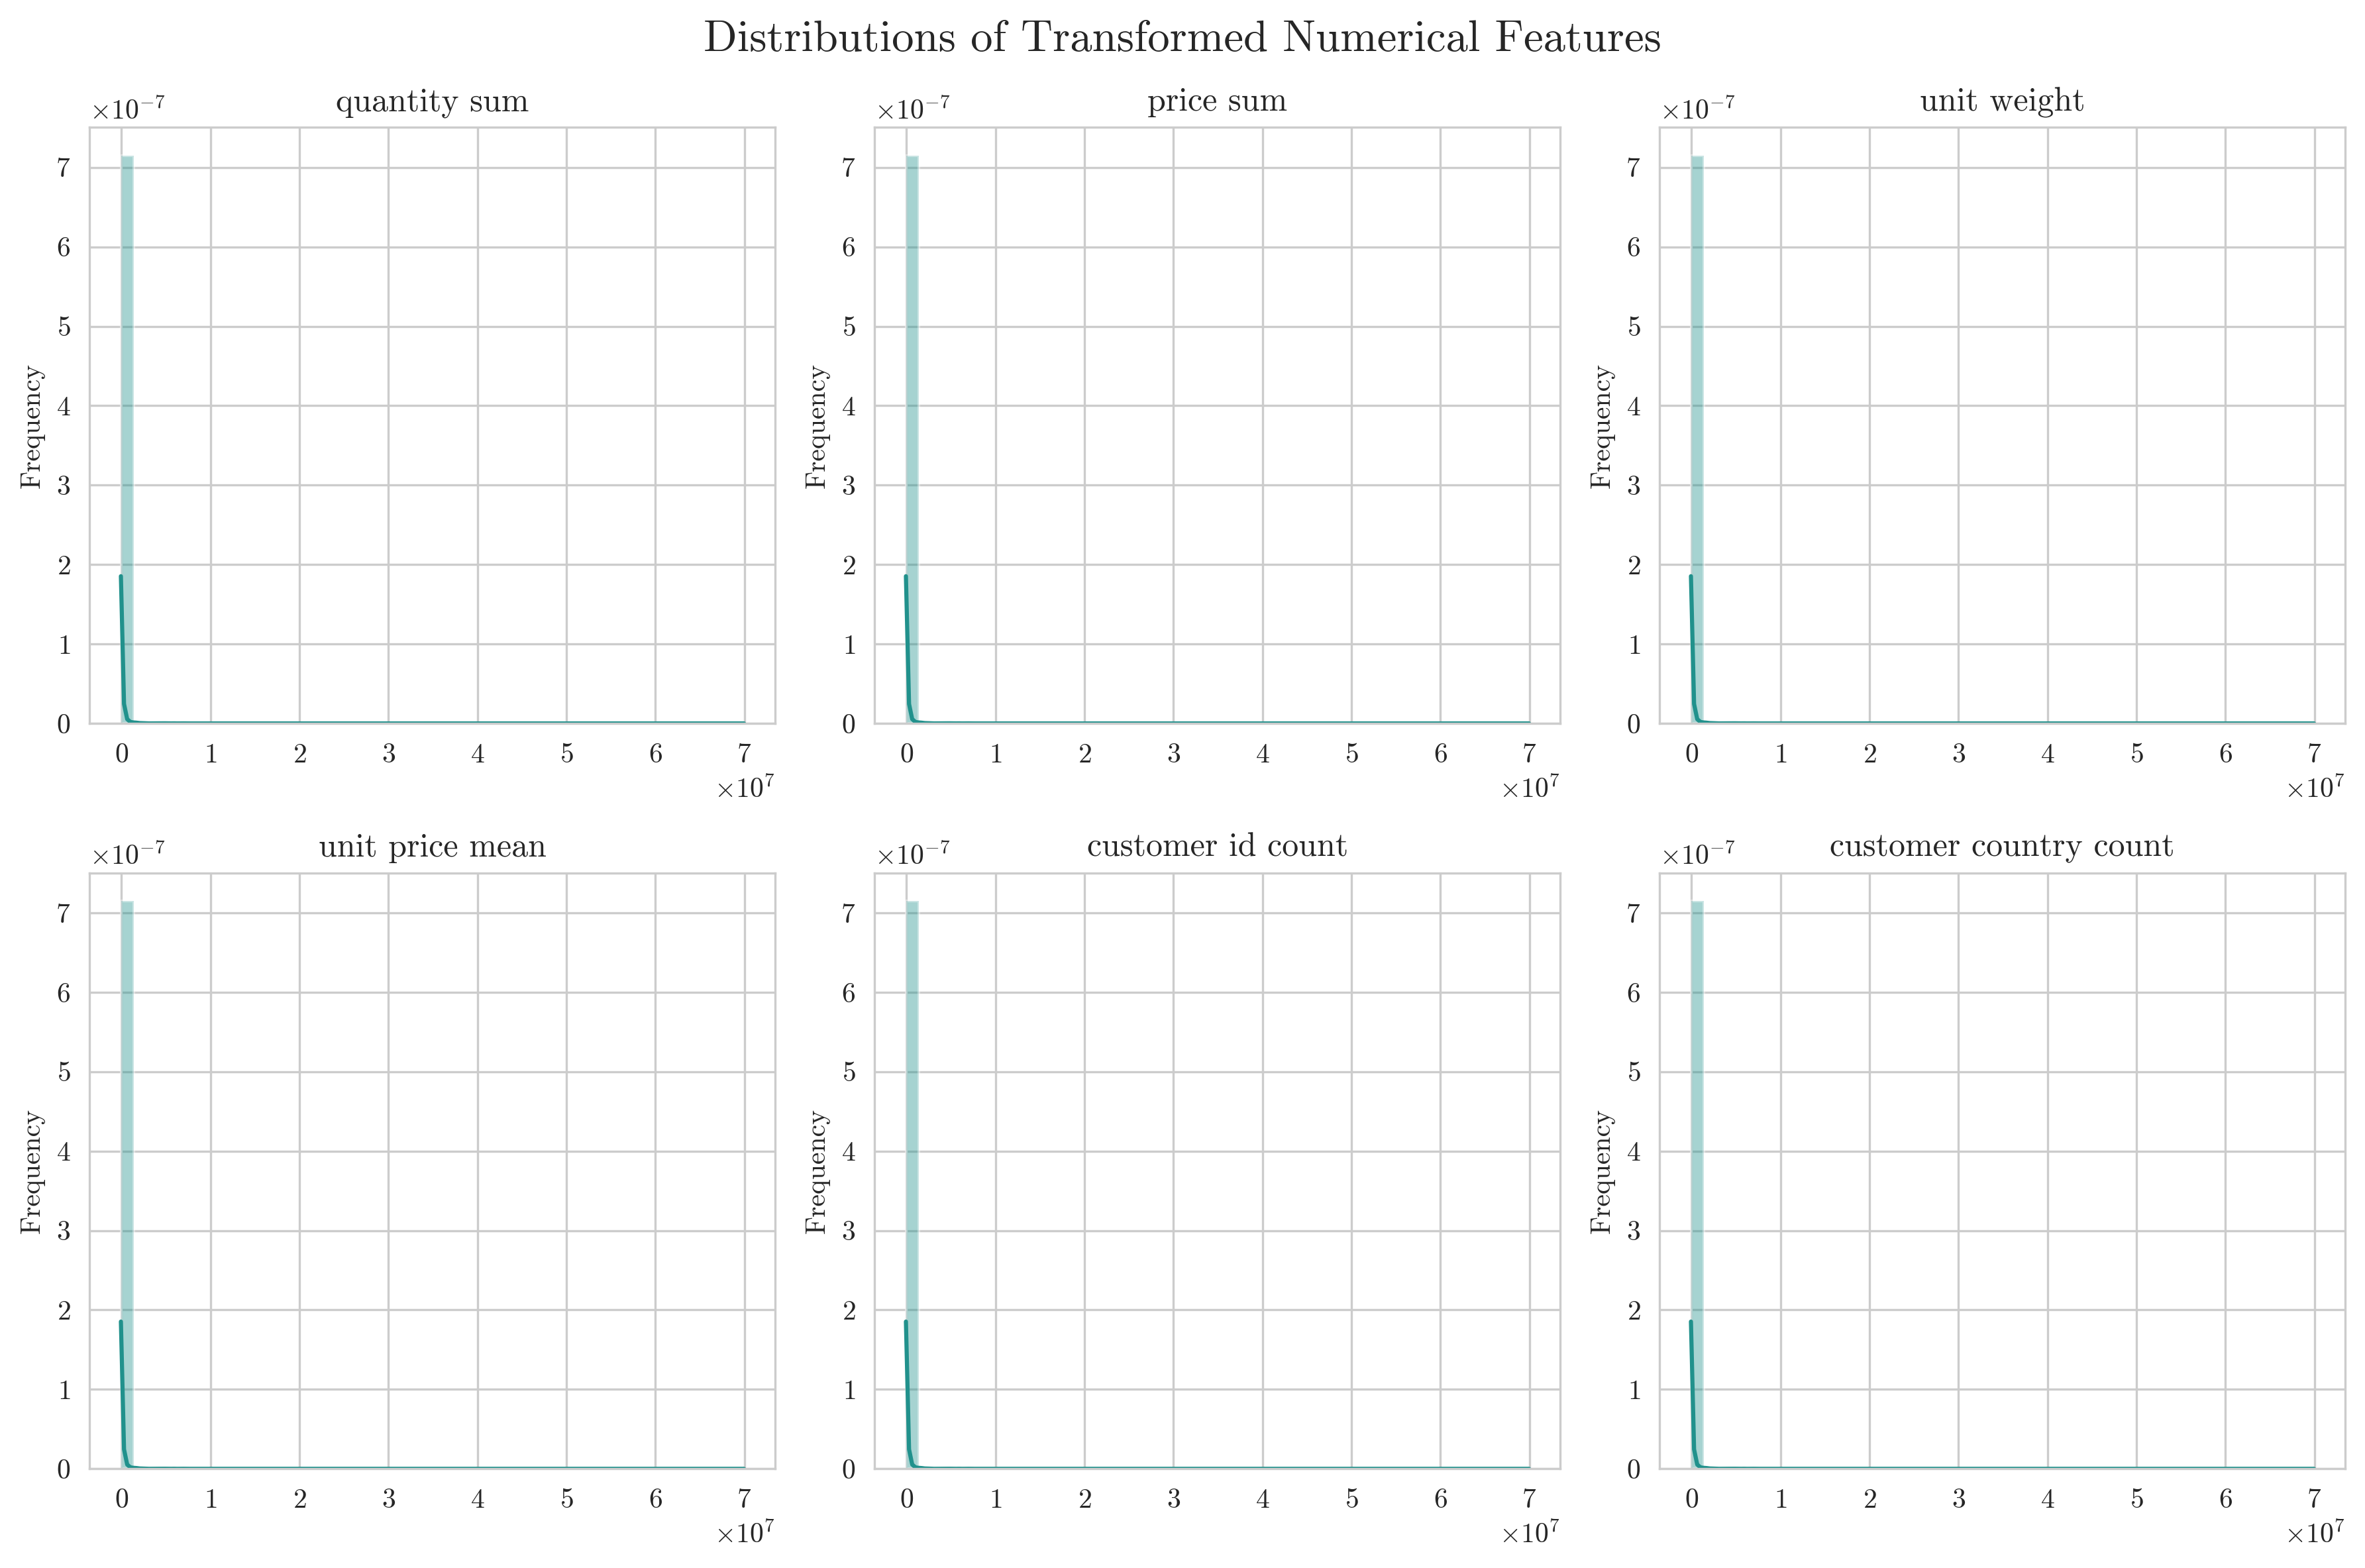

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create subplots
n_rows = 2
n_cols = 3
fig, axs = plt.subplots(n_rows, n_cols, figsize=(12, 8), dpi=300)

# Choose a color from the viridis palette (e.g., 0.5 for a mid-range color)
viridis_color = plt.cm.viridis(0.5)

for idx, feature in enumerate(num_cols):
    row = idx // n_cols
    col = idx % n_cols
    sns.distplot(df[num_cols], kde=True, ax=axs[row, col], color=viridis_color)
    
    # Remove underscores from feature names for titles
    feature_title = feature.replace('_', ' ')
    axs[row, col].set_title(feature_title)
    axs[row, col].set_xlabel('')
    axs[row, col].set_ylabel('Frequency')
 
# Add a main title to the subplots
fig.suptitle('Distributions of Transformed Numerical Features', fontsize=16)

# Adjust subplot parameters to fit the main title
fig.subplots_adjust(top=0.94)

plt.tight_layout()

# Save the figure
save_figure(fig, 'all_data_transformed_multiple_histograms_robust')

plt.show()

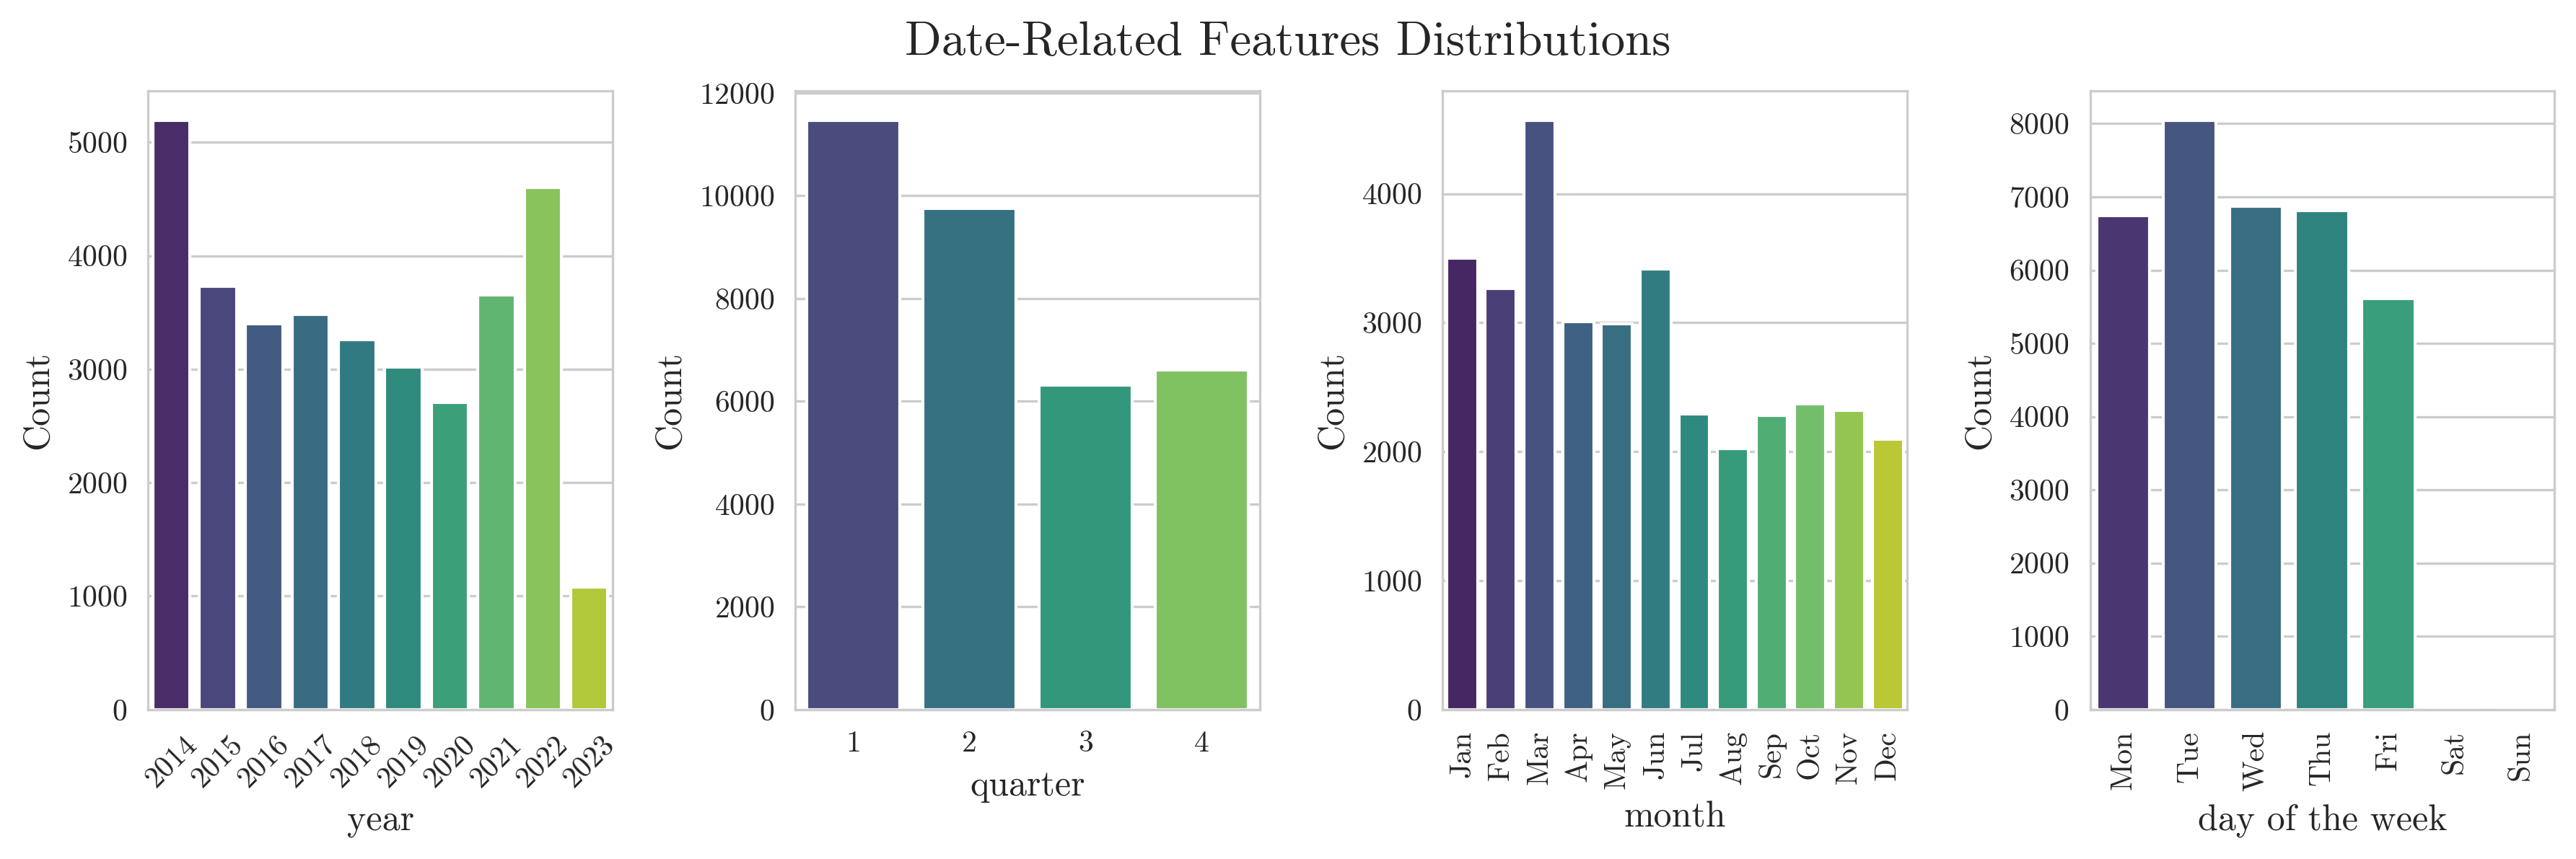

In [12]:
# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Font settings
mpl.rcParams['font.family'] = 'serif'
cmfont = font_manager.FontProperties(fname=mpl.get_data_path() + '/fonts/ttf/cmr10.ttf')
mpl.rcParams['font.serif'] = cmfont.get_name()
mpl.rcParams['mathtext.fontset'] = 'cm'
mpl.rcParams['axes.unicode_minus'] = False
mpl.rcParams['axes.formatter.use_mathtext'] = True

# Prepare the figure layout with 4 subplots
fig, axes = plt.subplots(1, 4, figsize=(12, 4), sharex=False, dpi = 300)

# Flatten the axes array for easy iteration
axes = axes.flatten()

# List of categorical columns
columns = ['year_mode', 'quarter_mode', 'month_mode', 'day_week_mode']
# Corresponding x-axis labels
x_labels = ['year', 'quarter', 'month', 'day of the week']

# Iterate over the categorical columns and create a countplot for each
for i, col in enumerate(columns):
    sns.countplot(x=col, data=df, ax=axes[i], palette='viridis')
    axes[i].set_xlabel(x_labels[i], fontsize=12)
    axes[i].set_ylabel('Count', fontsize=12)
    # Set custom x-tick labels for month and day of the week if applicable
    if col == 'month_mode':
        axes[i].set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                                 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=90)
    # Inside your loop, after creating the countplot for each subplot:
    if col == 'year_mode':
        axes[i].tick_params(axis='x', rotation=45)

    elif col == 'day_week_mode':
        axes[i].set_xticklabels(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], rotation=90)

# Adjust the layout
plt.tight_layout()

# Add a main title
plt.subplots_adjust(top=0.9)  # Adjust the top to make space for the main title
fig.suptitle('Date-Related Features Distributions', fontsize=16, fontproperties=cmfont)

# Show the plot
plt.show()

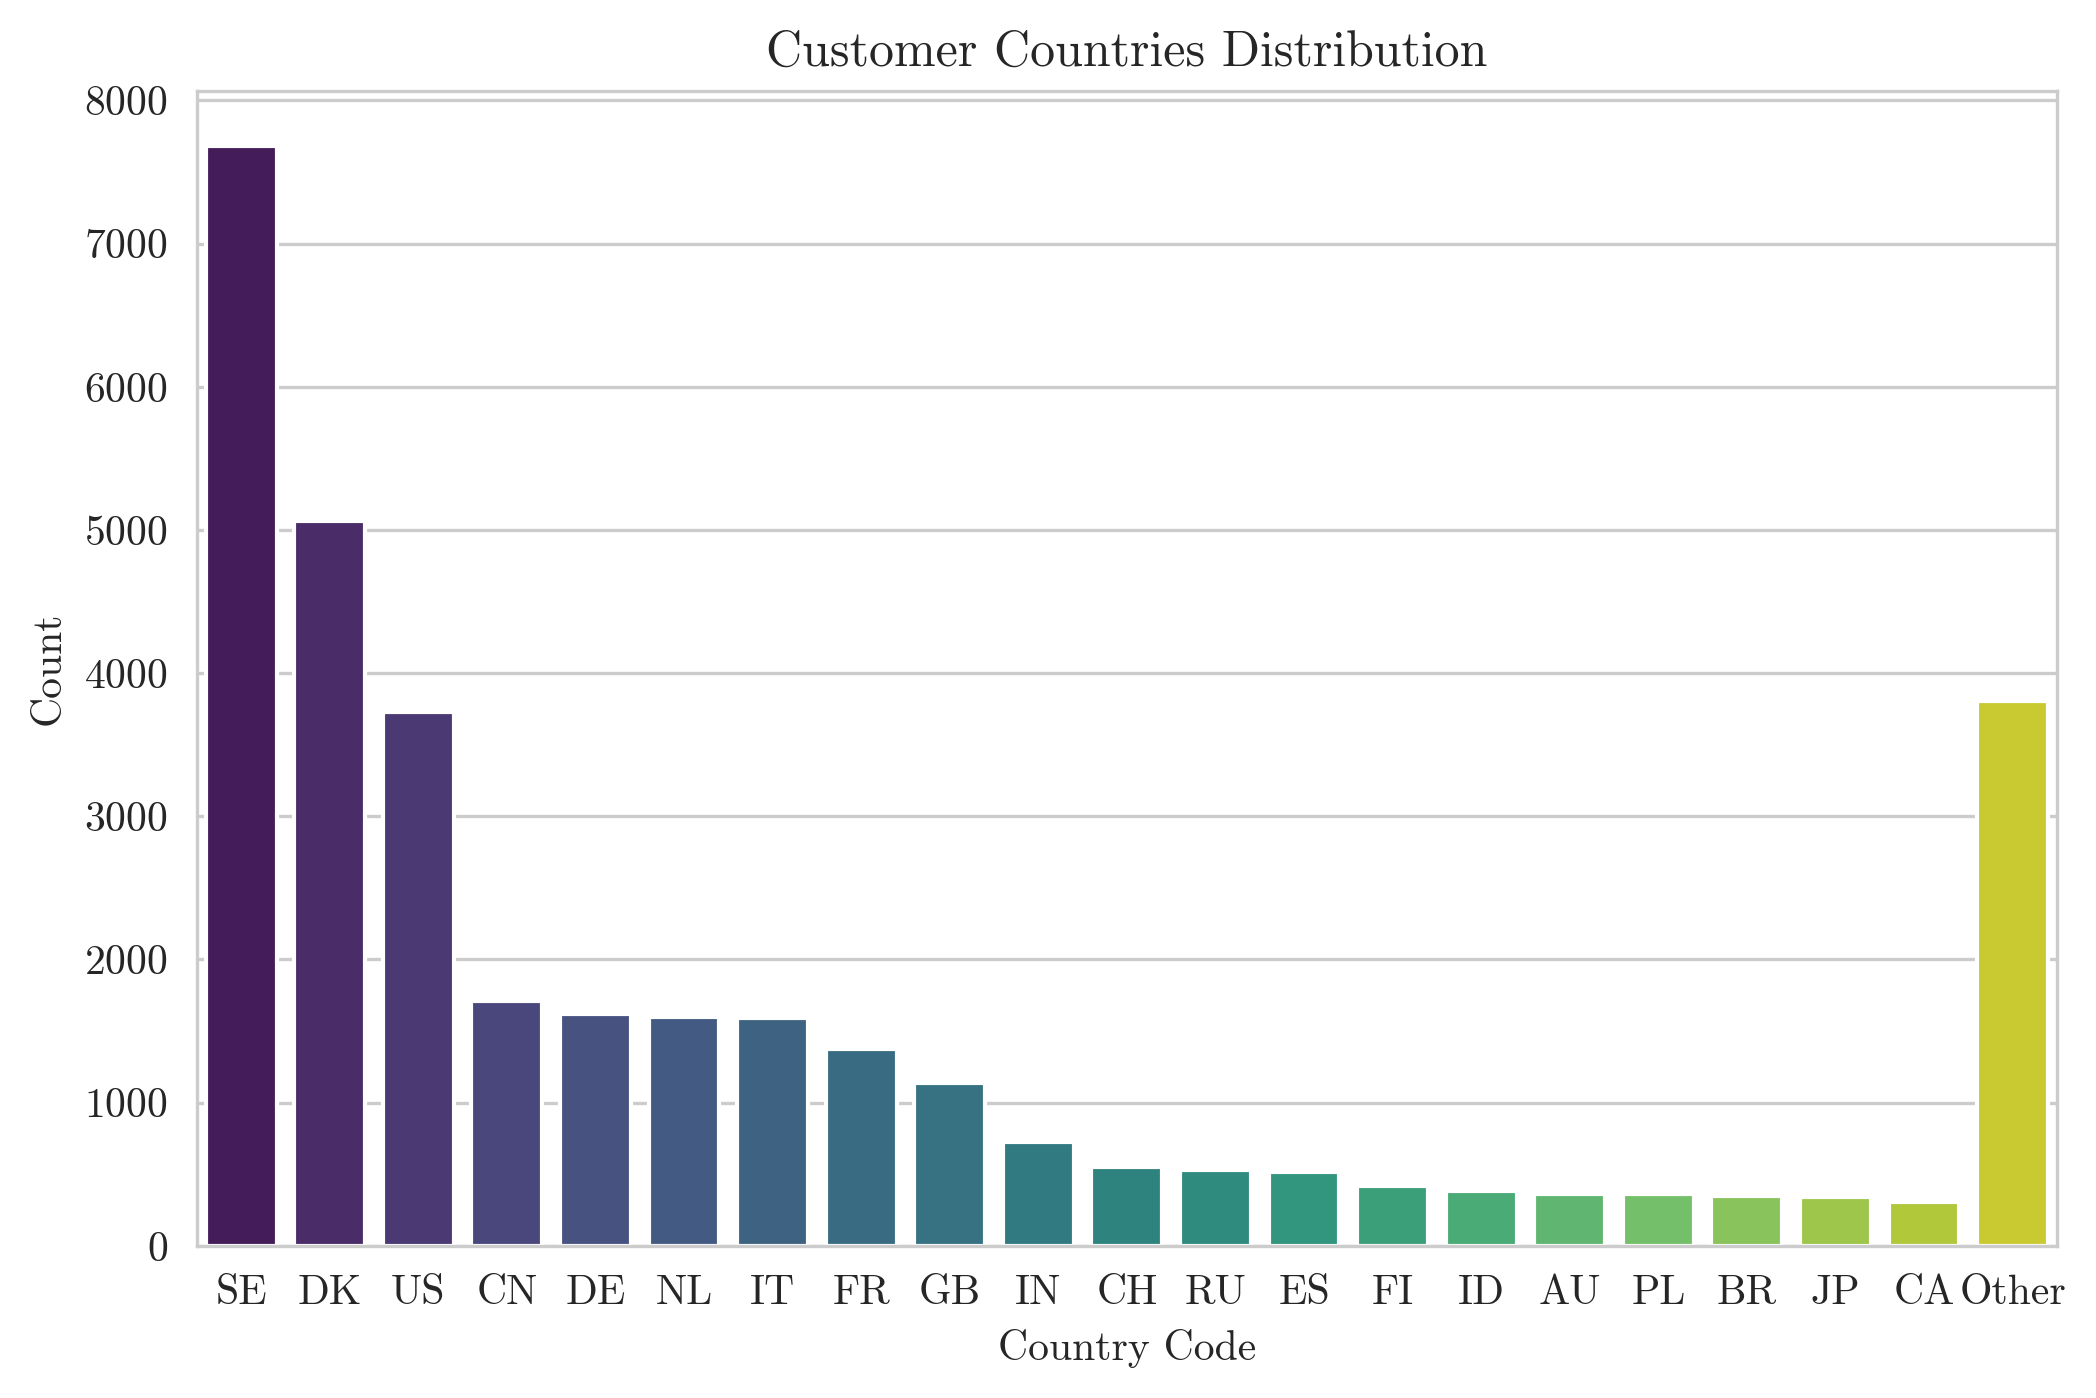

In [9]:
# Set the threshold for the top N countries to display
top_n = 20

# Calculate the counts of each country code
country_counts = df['customer_country_mode'].value_counts()

# Create a DataFrame for the top N countries
top_countries = country_counts.head(top_n).reset_index()
top_countries.columns = ['country_code', 'count']

# Add an 'Other' category for the rest of the countries
other_count = pd.DataFrame(data={
    'country_code': ['Other'],
    'count': [country_counts.iloc[top_n:].sum()]
})

# Combine the top countries with the 'Other' category
final_counts = pd.concat([top_countries, other_count], ignore_index=True)

# Create the bar plot
plt.figure(figsize=(8, 5), dpi = 300)
sns.barplot(x='country_code', y='count', data=final_counts, palette='viridis')
plt.title('Customer Countries Distribution')
plt.xlabel('Country Code')
plt.ylabel('Count')

# Show the plot
plt.show()

<Figure size 1920x1440 with 0 Axes>

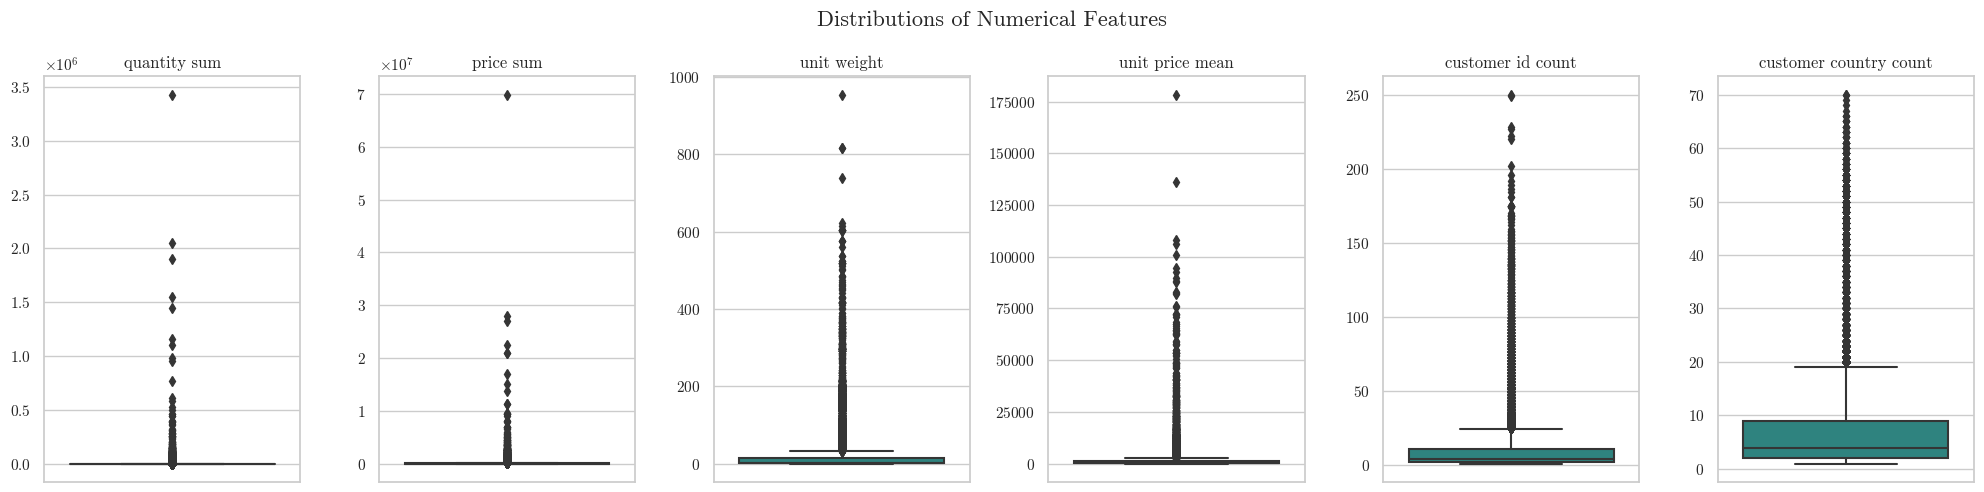

In [12]:
# Set the aesthetic style of the plots
sns.set(style="whitegrid")

plt.figure(dpi = 300)

# Font settings
mpl.rcParams['font.family'] = 'serif'
cmfont = font_manager.FontProperties(fname=mpl.get_data_path() + '/fonts/ttf/cmr10.ttf')
mpl.rcParams['font.serif'] = cmfont.get_name()
mpl.rcParams['mathtext.fontset'] = 'cm'
mpl.rcParams['axes.unicode_minus'] = False
mpl.rcParams['axes.formatter.use_mathtext'] = True

# List of numerical columns for which we want to create boxplots
num_cols = ['quantity_sum', 'price_sum', 'unit_weight', 'unit_price_mean', 'customer_id_count', 'customer_country_count']

# Prepare the figure layout
fig, axes = plt.subplots(nrows=1, ncols=len(num_cols), figsize=(20, 5), constrained_layout=True)

# Create a boxplot for each numerical column using Seaborn
for i, col in enumerate(num_cols):
    sns.boxplot(y=df[col], ax=axes[i], palette='viridis')
    axes[i].set_title(col.replace('_', ' '))
    axes[i].set_xlabel('')  # Remove the x-axis label
    axes[i].set_ylabel('')  # Remove the y-axis label

plt.subplots_adjust(top=0.95)
fig.suptitle('Distributions of Numerical Features', fontsize=16)

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

In [18]:
# # Assuming you've already imported the necessary libraries and defined the save_figure function

# plt.figure(figsize=(12,10))
# sns.heatmap(df[num_cols].corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
# plt.title('Correlation Heatmap')

# plt.yticks(rotation=360)

# # Adjust the layout to ensure everything fits
# plt.tight_layout()

# # Save the figure using the save_figure function
# fig = plt.gcf()  # Gets the current figure
# # save_figure(fig, 'corr_feat_heatmap')

# plt.show()


In [6]:
categorical_columns = ['month_mode', 'quarter_mode', 'year_mode', 'day_week_mode', 'customer_country_mode']
numerical_columns = []
log_transform_columns = ['quantity_sum', 'price_sum', 'unit_weight', 'unit_price_mean', 'customer_id_count','customer_country_count']

pipeline = PreprocessingPipeline(categorical_columns, numerical_columns, log_transform_columns)
df_transformed = pipeline.fit_transform(df)
transformed_df_with_headers = pipeline.get_transformed_df()

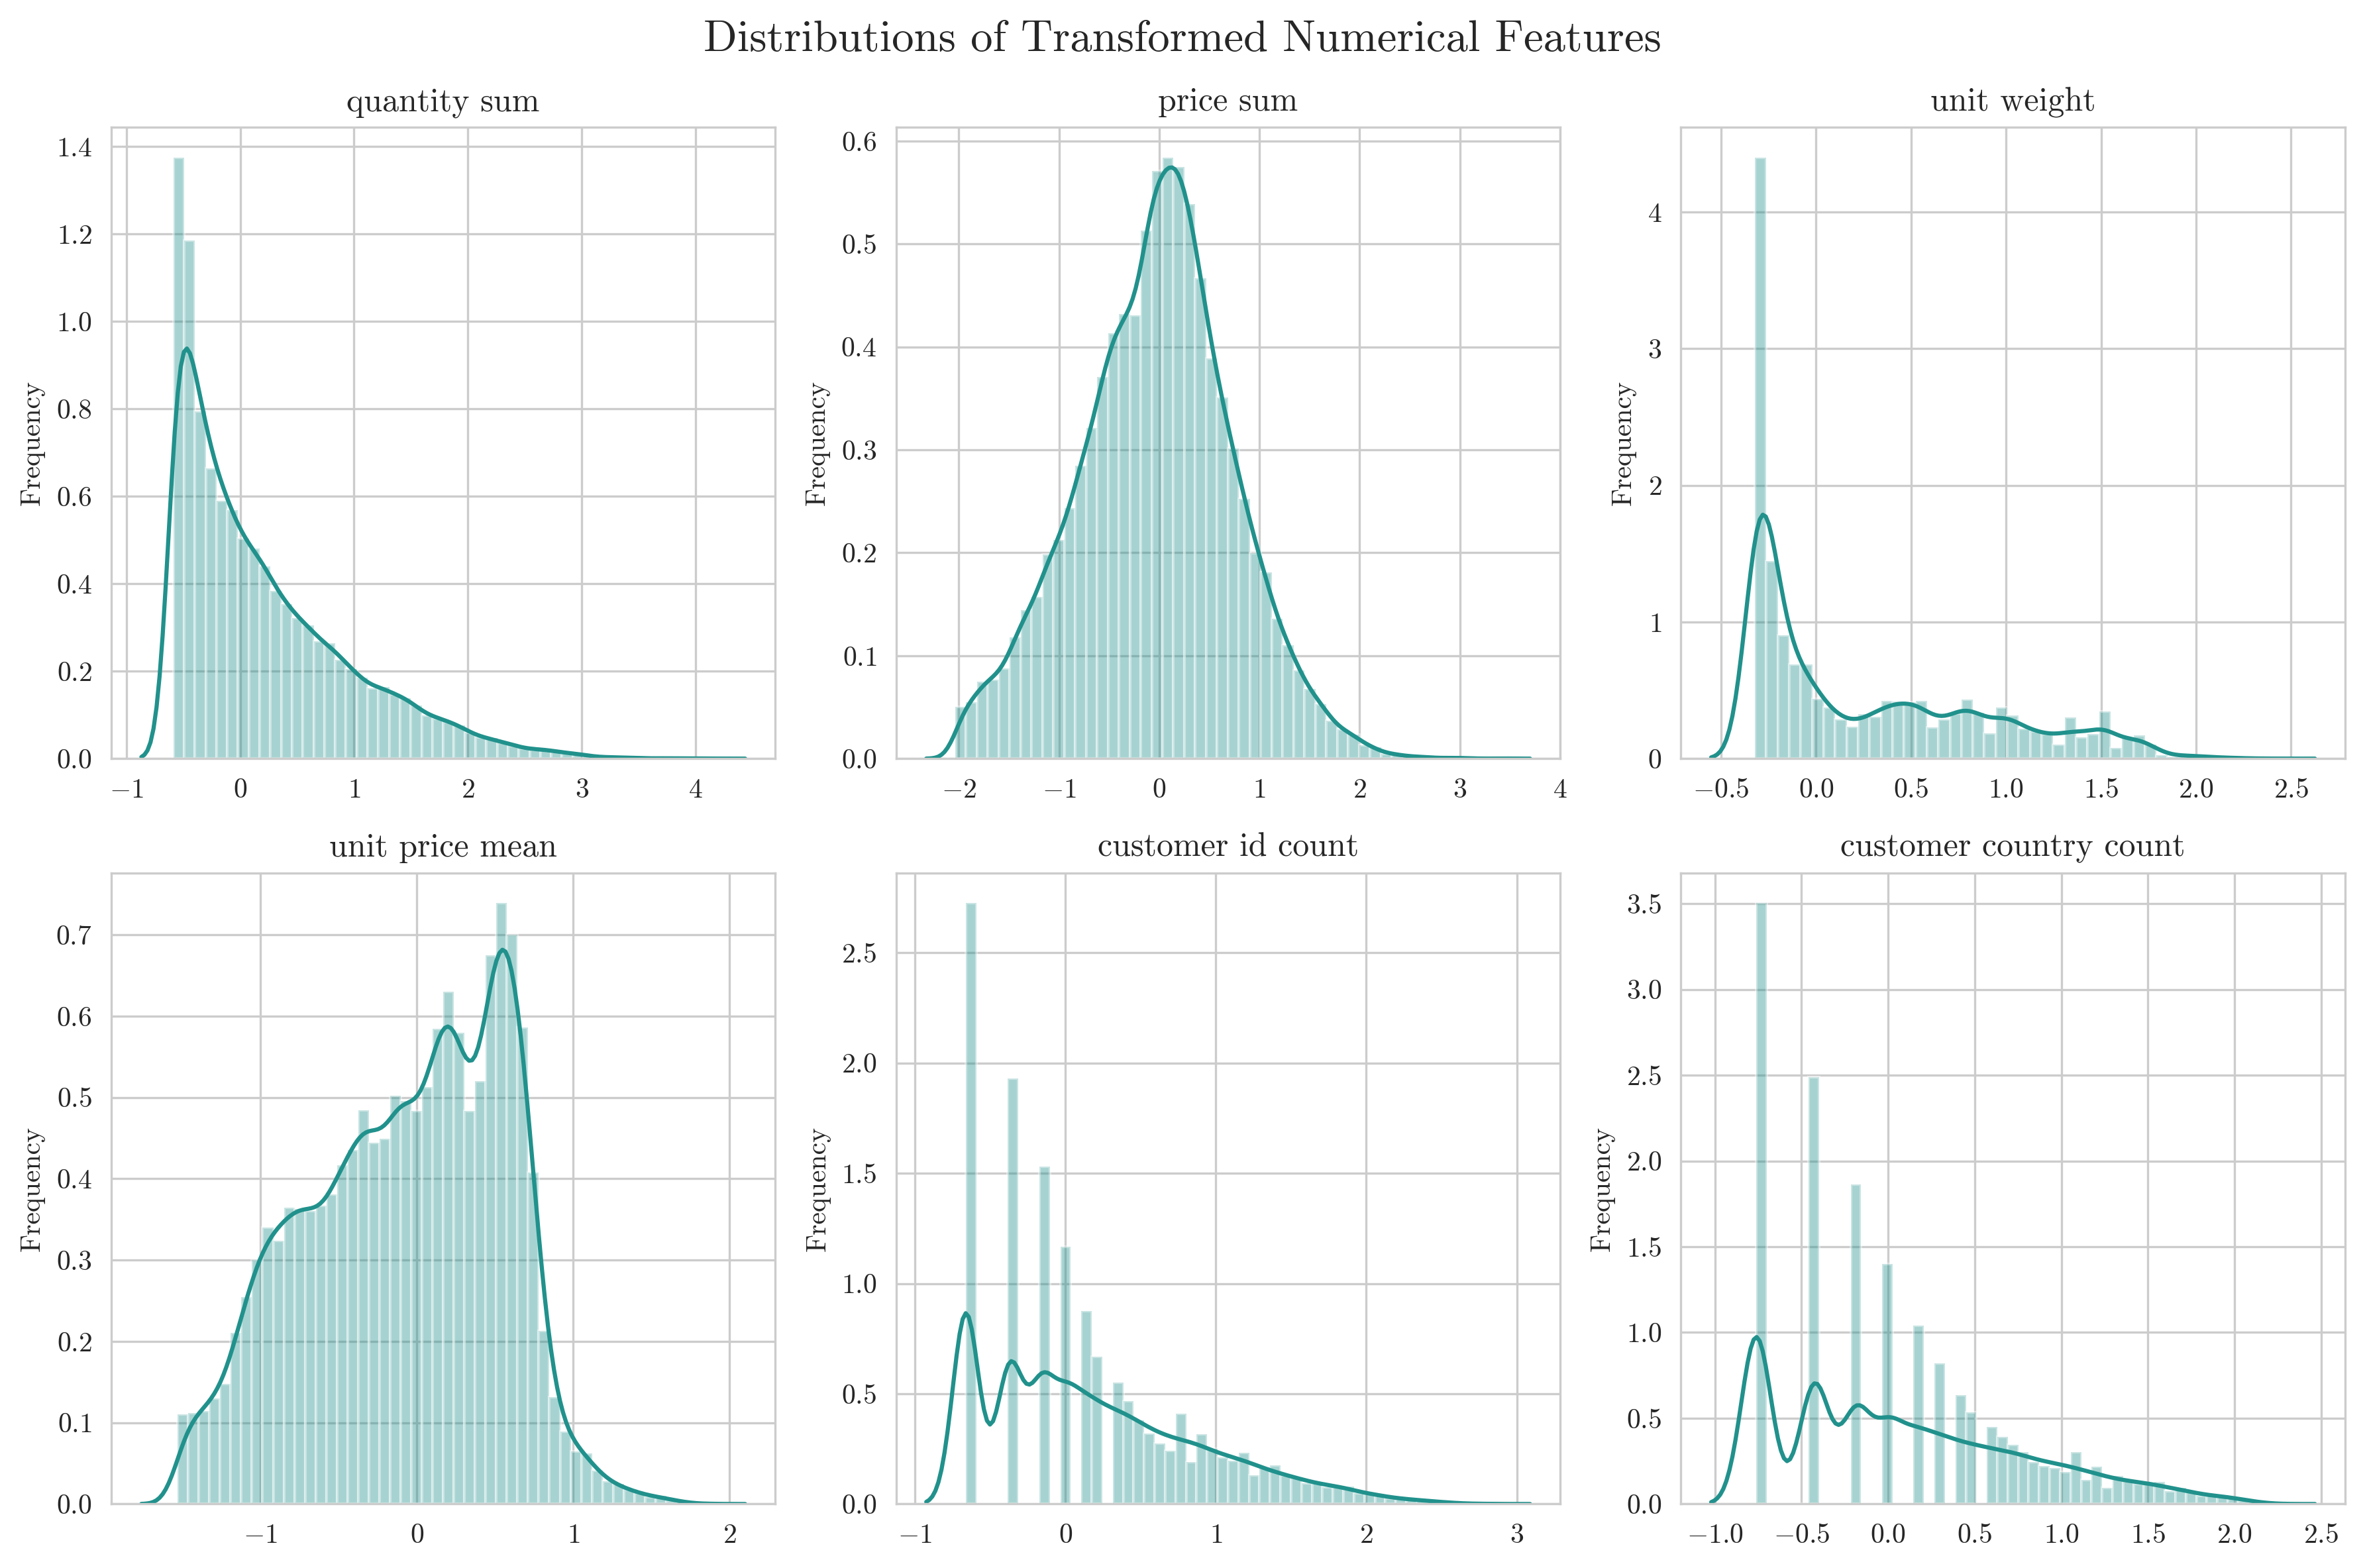

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of features to plot
features = ['quantity_sum', 'price_sum', 'unit_weight', 'unit_price_mean', 'customer_id_count', 'customer_country_count']

# Create subplots
n_rows = 2
n_cols = 3
fig, axs = plt.subplots(n_rows, n_cols, figsize=(12, 8), dpi=300)

# Choose a color from the viridis palette (e.g., 0.5 for a mid-range color)
viridis_color = plt.cm.viridis(0.5)

for idx, feature in enumerate(features):
    row = idx // n_cols
    col = idx % n_cols
    sns.distplot(transformed_df_with_headers[feature], kde=True, ax=axs[row, col], color=viridis_color)
    
    # Remove underscores from feature names for titles
    feature_title = feature.replace('_', ' ')
    axs[row, col].set_title(feature_title)
    axs[row, col].set_xlabel('')
    axs[row, col].set_ylabel('Frequency')
 
# Add a main title to the subplots
fig.suptitle('Distributions of Transformed Numerical Features', fontsize=16)

# Adjust subplot parameters to fit the main title
fig.subplots_adjust(top=0.94)

plt.tight_layout()

# Save the figure
save_figure(fig, 'all_data_transformed_multiple_histograms_robust')

plt.show()


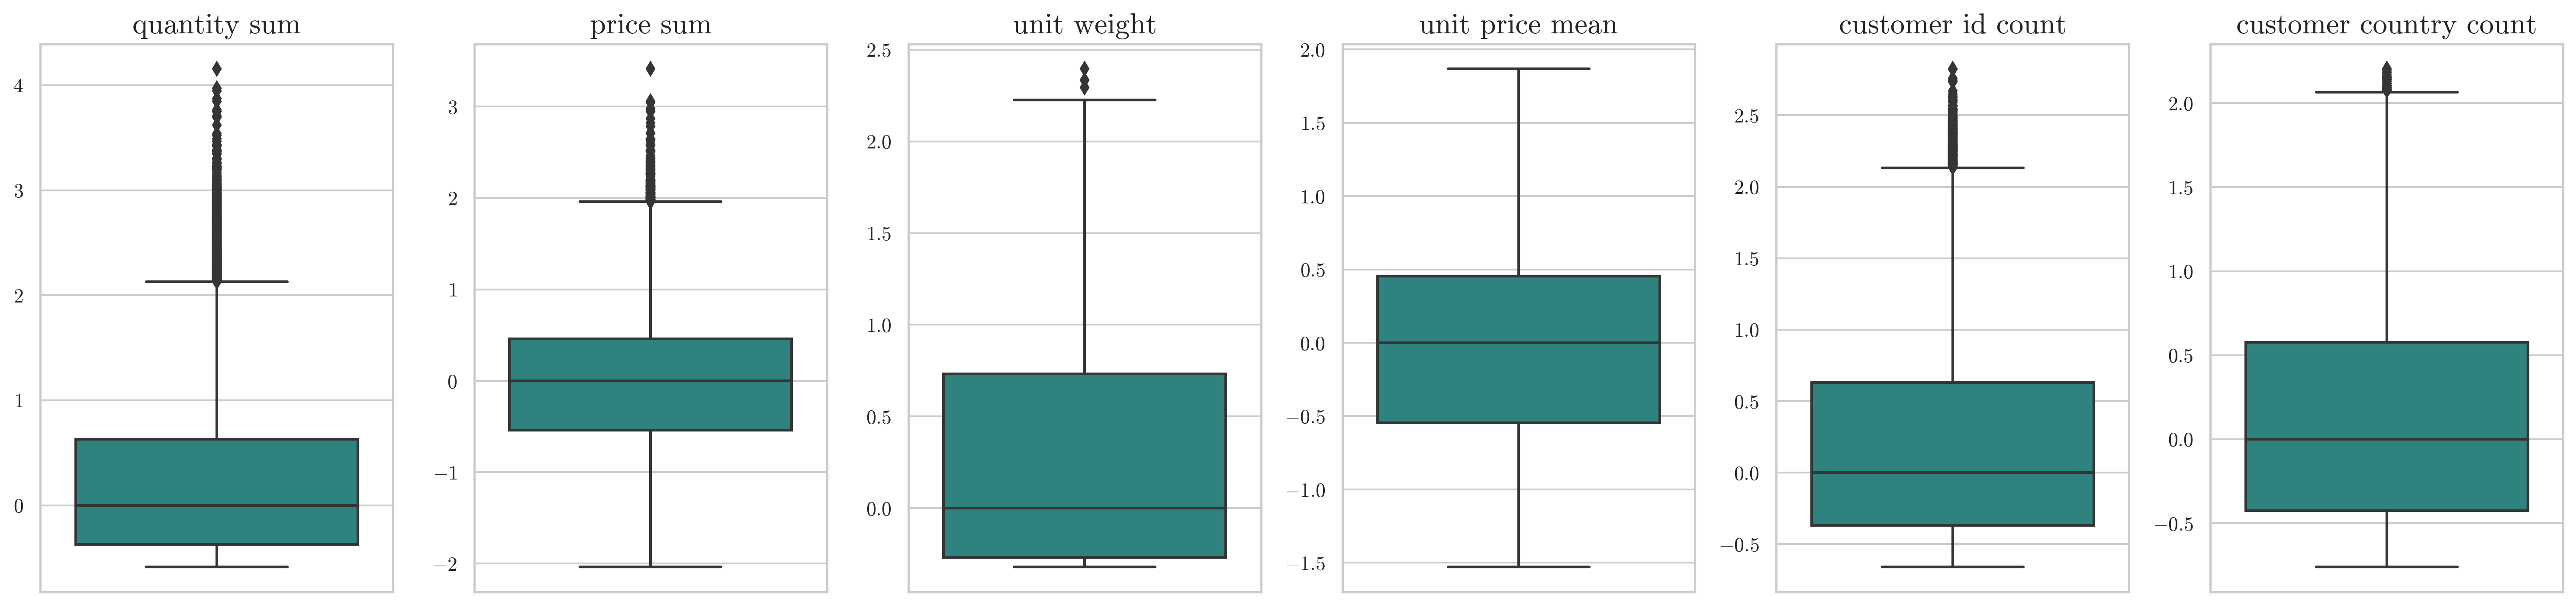

In [14]:


# List of features to plot
features = ['quantity_sum', 'price_sum', 'unit_weight', 'unit_price_mean', 'customer_id_count', 'customer_country_count']

# Setting up the figure and axis
fig, axs = plt.subplots(1, len(features), figsize=(20, 5), dpi = 300)

# Loop over each feature and plot a boxplot on its respective axis
for i, feature in enumerate(features):
    sns.boxplot(y=transformed_df_with_headers[feature], ax=axs[i], palette='viridis')
    axs[i].set_title(feature.replace('_', ' '), fontsize=16)
    axs[i].set_xlabel('')  # Remove the x-axis label
    axs[i].set_ylabel('')  # Remove the y-axis label

# Add a main title to the subplots
fig.suptitle('', fontsize=18)

# Adjust subplot parameters to fit the main title
fig.subplots_adjust(top=0.92)

plt.tight_layout()

# Save the figure
save_figure(fig, 'all_data_transformed_multiple_boxplots_robust')

plt.show()


## PCA

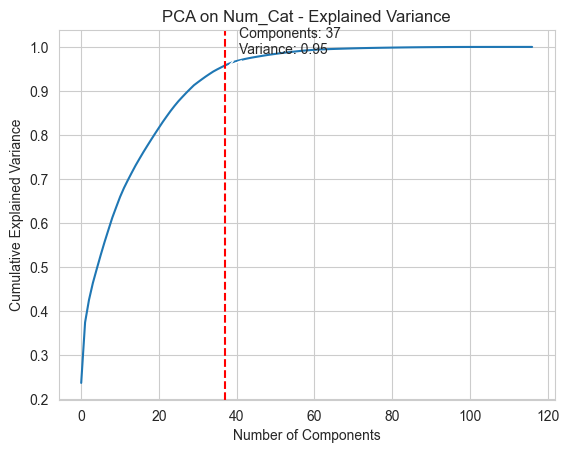

In [ ]:
X_pca = pca_reduction(df_transformed, 'Num_Cat')

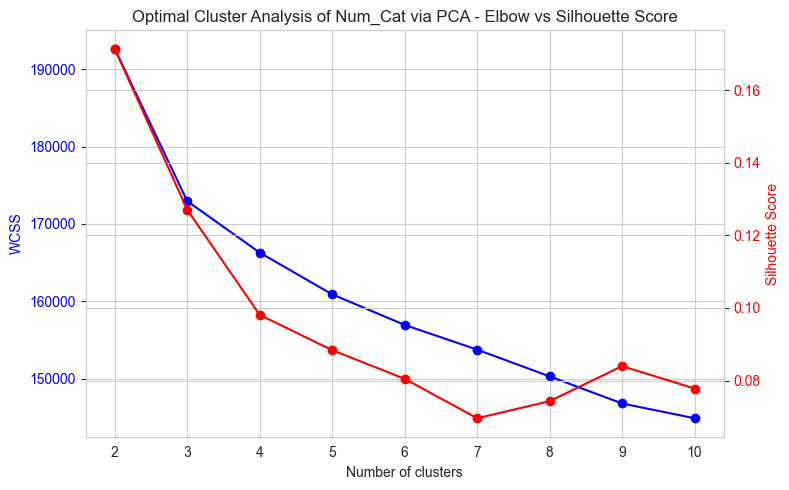

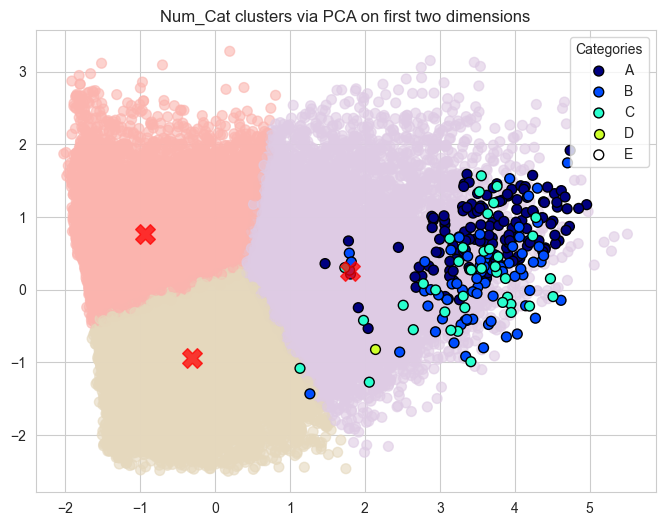

,product_id,description,month_mode,quarter_mode,year_mode,day_week_mode,quantity_sum,price_sum,unit_weight,customer_country_mode,customer_country_count,customer_id_count,category,unit_price_mean,description_original,Num_Cat_PCA_Cluster_Labels,Num_Cat_PCA_Distance_to_Centroid
0,010004,cfcf sfy bolted hanger nptf stud viton,2,1,2020,2,6,232.92,0.124,DK,1,1,-1,38.8200,"C24FCF-1/2-SFY-S BOLTED HANGER, N...",2,2.378958
1,010005,cfcf sfy bolted hanger nptf stud viton,10,4,2019,2,200,1774.00,0.259,CO,1,1,-1,8.8700,"C24FCF-1-SFY-S BOLTED HANGER, N...",2,2.249002
2,010006,cfcf sfy bolted hanger nptf stud viton,10,4,2019,2,300,1848.00,0.276,CO,1,1,-1,6.1600,"C24FCF-1 1/2-SFY-S BOLTED HANGER, N...",2,2.314376
3,010015,cfcf sfy bolted hanger nptf stud viton,1,1,2019,2,300,2115.00,0.318,SE,2,2,-1,7.0500,"C24FCF-2-SFY-S BOLTED HANGER, N...",2,2.224296
4,010040,cfcf sfy bolted hanger nptf stud viton,1,1,2019,2,400,3119.00,0.363,CO,2,2,-1,7.7975,"C24FCF-3-SFY-S BOLTED HANGER, N...",2,2.148274
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34126,TE929K,slide bearing,3,1,2016,4,636,15681.71,0.011,US,20,23,-1,24.6568,SLIDE BEARING ...,1,2.093751
34127,TE980931,weld adapt tz npt sch pipe,12,4,2017,4,6,524.95,0.270,GB,2,2,-1,87.4917,"WELD.ADAPT. TZ-74 NPT/1½""SCH40 PIP...",2,2.265442
34128,TEB6042,bottom liner,10,3,2017,1,158,1827.25,0.038,SE,15,18,-1,11.5649,BOTTOM LINER ...,1,2.374565
34129,TEB604Z,stem,6,1,2020,1,13,2586.04,1.150,US,4,6,-1,198.9262,STEM ...,2,2.129697


In [ ]:
cluster_and_visualize(X_pca, df, reduction_method_name='PCA', feature_type='Num_Cat')

## t-SNE

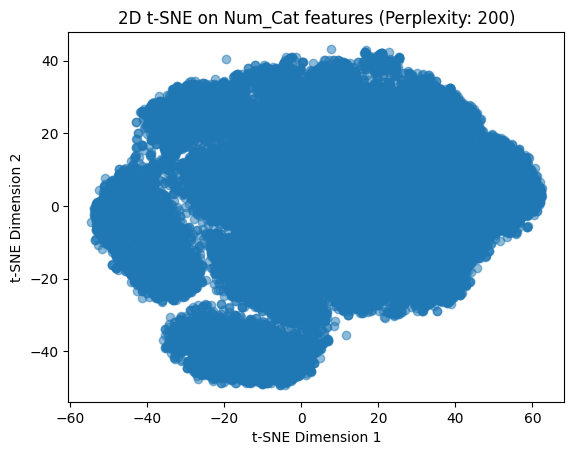

In [ ]:
X_tsne = tsne_reduction(df_transformed, 'Num_Cat', perplexity=200, metric='euclidean')

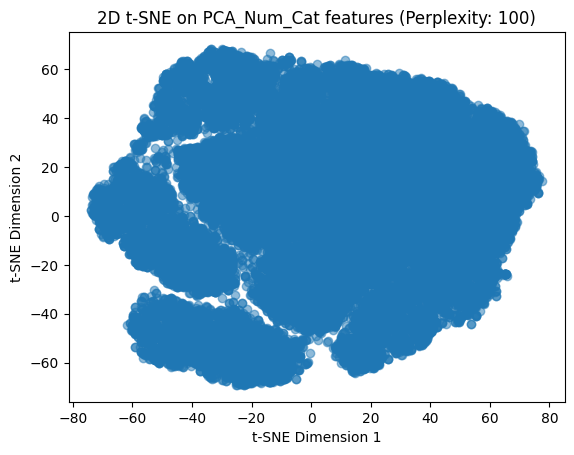

In [ ]:
X_tsne = tsne_reduction(X_pca, 'PCA_Num_Cat', perplexity=100, metric='euclidean')

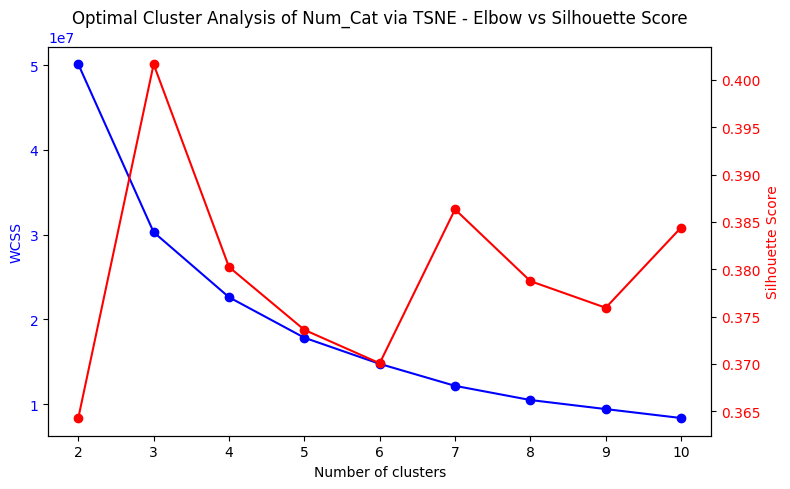

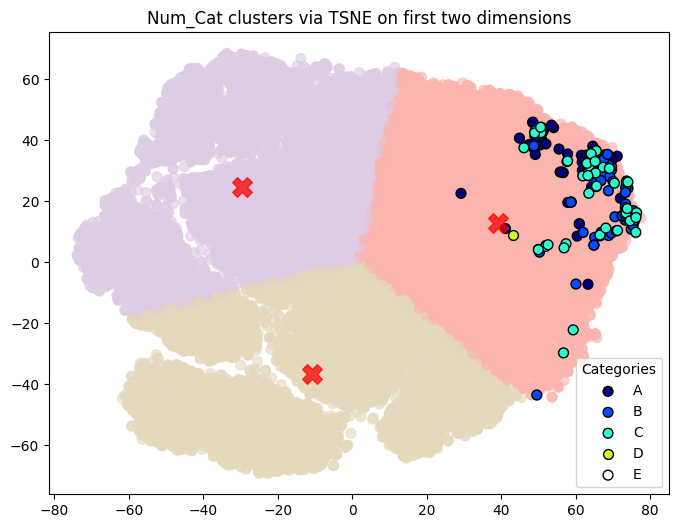

,product_id,description,month_mode,quarter_mode,year_mode,day_week_mode,quantity_sum,price_sum,unit_weight,customer_country_mode,customer_country_count,customer_id_count,category,unit_price_mean,description_original,Num_Cat_PCA_Cluster_Labels,Num_Cat_PCA_Distance_to_Centroid,Num_Cat_TSNE_Cluster_Labels,Num_Cat_TSNE_Distance_to_Centroid
0,010004,cfcf sfy bolted hanger nptf stud viton,2,1,2020,2,6,232.92,0.124,DK,1,1,-1,38.8200,"C24FCF-1/2-SFY-S BOLTED HANGER, N...",2,2.646131,2,49.122276
1,010005,cfcf sfy bolted hanger nptf stud viton,10,4,2019,2,200,1774.00,0.259,CO,1,1,-1,8.8700,"C24FCF-1-SFY-S BOLTED HANGER, N...",2,2.534726,2,33.386932
2,010006,cfcf sfy bolted hanger nptf stud viton,10,4,2019,2,300,1848.00,0.276,CO,1,1,-1,6.1600,"C24FCF-1 1/2-SFY-S BOLTED HANGER, N...",2,2.651322,2,33.400024
3,010015,cfcf sfy bolted hanger nptf stud viton,1,1,2019,2,300,2115.00,0.318,SE,2,2,-1,7.0500,"C24FCF-2-SFY-S BOLTED HANGER, N...",2,2.454335,2,48.130367
4,010040,cfcf sfy bolted hanger nptf stud viton,1,1,2019,2,400,3119.00,0.363,CO,2,2,-1,7.7975,"C24FCF-3-SFY-S BOLTED HANGER, N...",2,2.406671,2,48.135853
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34126,TE929K,slide bearing,3,1,2016,4,636,15681.71,0.011,US,20,23,-1,24.6568,SLIDE BEARING ...,1,2.146941,0,15.877225
34127,TE980931,weld adapt tz npt sch pipe,12,4,2017,4,6,524.95,0.270,GB,2,2,-1,87.4917,"WELD.ADAPT. TZ-74 NPT/1½""SCH40 PIP...",2,2.219879,2,26.864342
34128,TEB6042,bottom liner,10,3,2017,1,158,1827.25,0.038,SE,15,18,-1,11.5649,BOTTOM LINER ...,1,2.670973,0,22.805807
34129,TEB604Z,stem,6,1,2020,1,13,2586.04,1.150,US,4,6,-1,198.9262,STEM ...,2,2.135264,2,31.338293


In [ ]:
cluster_and_visualize(X_tsne, df, reduction_method_name='TSNE', feature_type='Num_Cat')

## UMAP

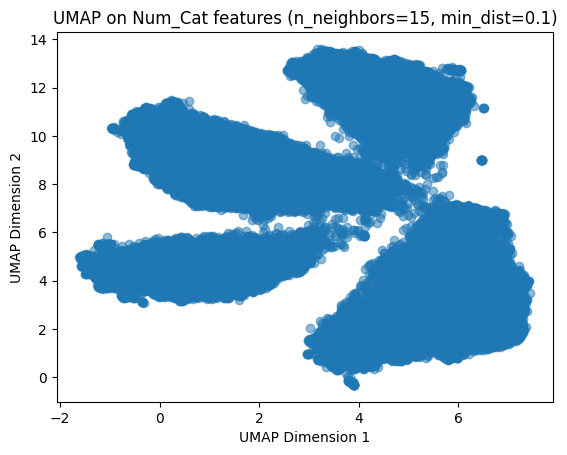

In [ ]:
X_umap = umap_reduction(df_transformed, n_neighbors=15, min_dist=0.1, metric='euclidean', feature_type='Num_Cat')

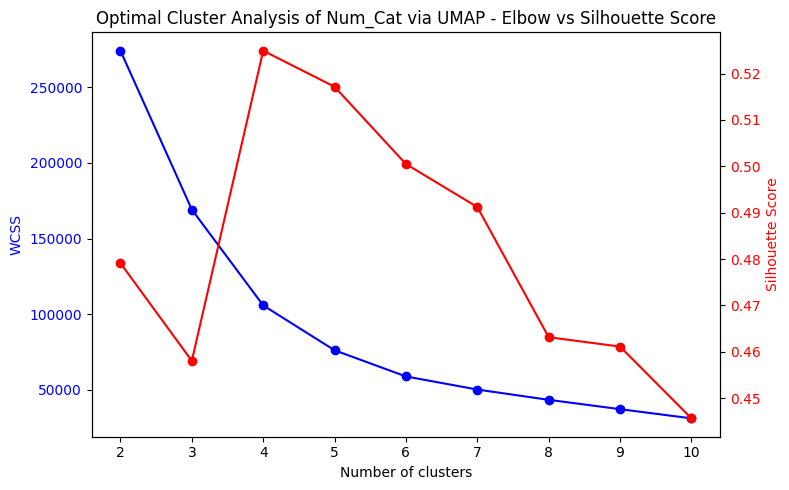

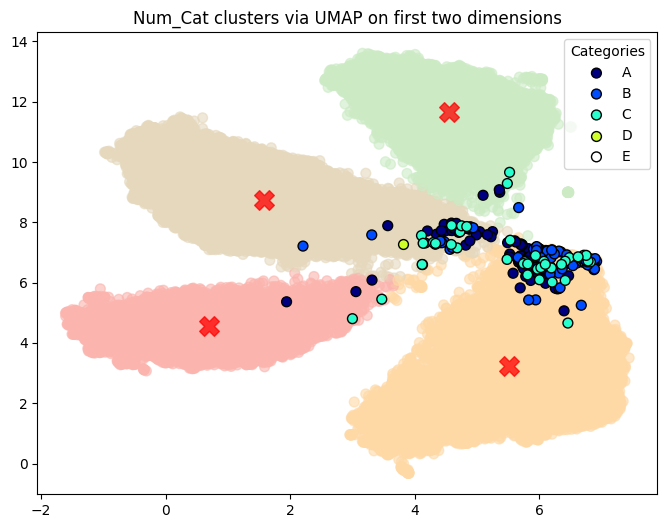

,product_id,description,month_mode,quarter_mode,year_mode,day_week_mode,quantity_sum,price_sum,unit_weight,customer_country_mode,...,customer_id_count,category,unit_price_mean,description_original,Num_Cat_PCA_Cluster_Labels,Num_Cat_PCA_Distance_to_Centroid,Num_Cat_TSNE_Cluster_Labels,Num_Cat_TSNE_Distance_to_Centroid,Num_Cat_UMAP_Cluster_Labels,Num_Cat_UMAP_Distance_to_Centroid
0,010004,cfcf sfy bolted hanger nptf stud viton,2,1,2020,2,6,232.92,0.124,DK,...,1,-1,38.8200,"C24FCF-1/2-SFY-S BOLTED HANGER, N...",2,2.646131,2,49.122276,2,1.543082
1,010005,cfcf sfy bolted hanger nptf stud viton,10,4,2019,2,200,1774.00,0.259,CO,...,1,-1,8.8700,"C24FCF-1-SFY-S BOLTED HANGER, N...",2,2.534726,2,33.386932,1,1.209289
2,010006,cfcf sfy bolted hanger nptf stud viton,10,4,2019,2,300,1848.00,0.276,CO,...,1,-1,6.1600,"C24FCF-1 1/2-SFY-S BOLTED HANGER, N...",2,2.651322,2,33.400024,1,1.244246
3,010015,cfcf sfy bolted hanger nptf stud viton,1,1,2019,2,300,2115.00,0.318,SE,...,2,-1,7.0500,"C24FCF-2-SFY-S BOLTED HANGER, N...",2,2.454335,2,48.130367,2,1.476068
4,010040,cfcf sfy bolted hanger nptf stud viton,1,1,2019,2,400,3119.00,0.363,CO,...,2,-1,7.7975,"C24FCF-3-SFY-S BOLTED HANGER, N...",2,2.406671,2,48.135853,2,1.458062
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34126,TE929K,slide bearing,3,1,2016,4,636,15681.71,0.011,US,...,23,-1,24.6568,SLIDE BEARING ...,1,2.146941,0,15.877225,2,1.861590
34127,TE980931,weld adapt tz npt sch pipe,12,4,2017,4,6,524.95,0.270,GB,...,2,-1,87.4917,"WELD.ADAPT. TZ-74 NPT/1½""SCH40 PIP...",2,2.219879,2,26.864342,1,1.341377
34128,TEB6042,bottom liner,10,3,2017,1,158,1827.25,0.038,SE,...,18,-1,11.5649,BOTTOM LINER ...,1,2.670973,0,22.805807,0,1.691239
34129,TEB604Z,stem,6,1,2020,1,13,2586.04,1.150,US,...,6,-1,198.9262,STEM ...,2,2.135264,2,31.338293,2,0.829426


In [ ]:
cluster_and_visualize(X_umap, df, reduction_method_name='UMAP', feature_type='Num_Cat')

In [ ]:
# write df to data folder with name df_Num_Cat_clusters.csv
df.to_csv('../data/df_Num_Cat_clusters_vol_2.csv', index=False)